In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [9]:
raw = pd.read_excel('Attribution_Sample_Data.xlsx', sheet_name= 'Raw Data')

In [11]:
attributed = pd.read_excel('Attribution_Sample_Data.xlsx', sheet_name= 'Attributed Data')

In [12]:
attributed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18569 entries, 0 to 18568
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         18569 non-null  datetime64[ns]
 1   customer_id  18569 non-null  object        
 2   user         18169 non-null  object        
 3   source       18569 non-null  object        
 4   event        18569 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 725.5+ KB


In [10]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745476 entries, 0 to 745475
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         745476 non-null  datetime64[ns]
 1   customer_id  745476 non-null  object        
 2   user         744918 non-null  object        
 3   source       557754 non-null  object        
 4   event        745476 non-null  object        
 5   cpc          743157 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 34.1+ MB


In [13]:
attributed.head()

,date,customer_id,user,source,event
0,2021-06-17,1234,1f2d4dedd86b97ed837f373890216989,Programmatic Ads,attributed_conversion
1,2021-06-17,abcd,NaN,Programmatic Ads,attributed_conversion
2,2021-06-17,1234,639e310b862c2e80163699ee51745223,Programmatic Ads,attributed_conversion
3,2021-06-17,1234,b6b026b7dc77e002ac219e6f99e58417,Programmatic Ads,attributed_conversion
4,2021-06-17,1234,85532d281d4e89a1bf7b350ff89d3b49,Programmatic Ads,attributed_conversion


In [61]:
attributed.source.unique()

array(['Programmatic Ads', 'Paid Search', 'Video', 'Job Board', 'Text',
       'Social Media', 'Email'], dtype=object)

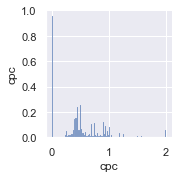

In [17]:

sns.pairplot(raw)


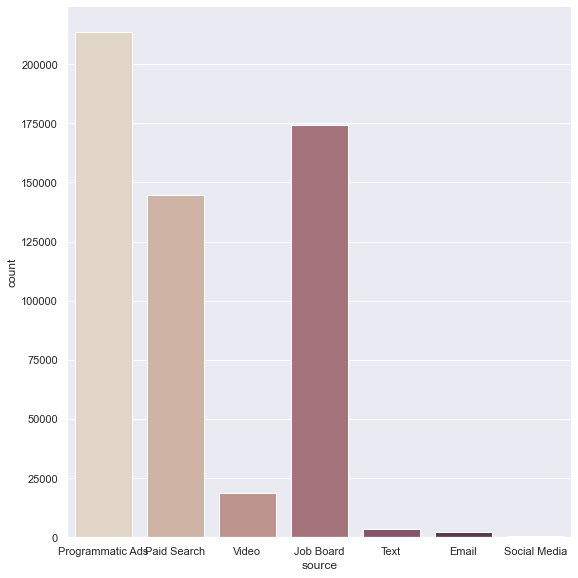

In [22]:
sns.catplot(x="source", kind="count", palette="ch:.25", data=raw, height = 8)

In [76]:
new= raw[['source','date']].groupby('source',  as_index= False ).count()
new['percentage']= new['date']/ sum(new['date'])

new

,source,date,percentage
0,Email,2319,0.004158
1,Job Board,174404,0.312690
2,Paid Search,144751,0.259525
3,Programmatic Ads,213589,0.382945
4,Social Media,558,0.001000
5,Text,3341,0.005990
6,Video,18792,0.033692


Text(0.45, 1, 'clicks per source (Normalized)')

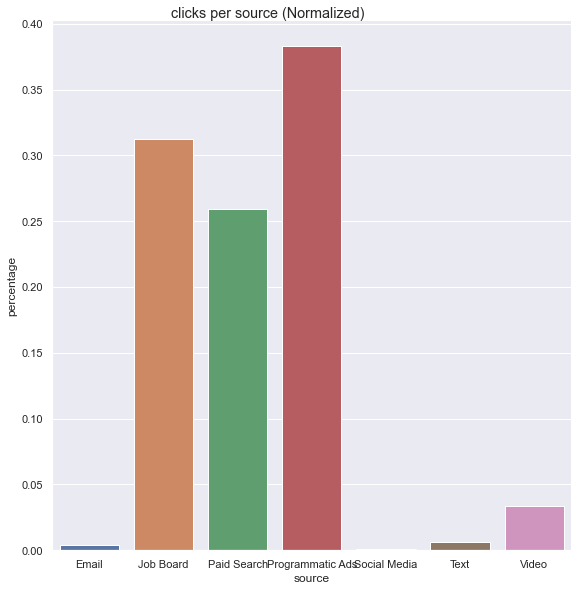

In [80]:
p= sns.catplot(data=new, x='source',y = 'percentage' , kind = 'bar', height=8)
p.fig.suptitle("clicks per source (Normalized)",fontdict= { 'fontsize': 12, 'fontweight':'bold'} ,x=0.45, y= 1)

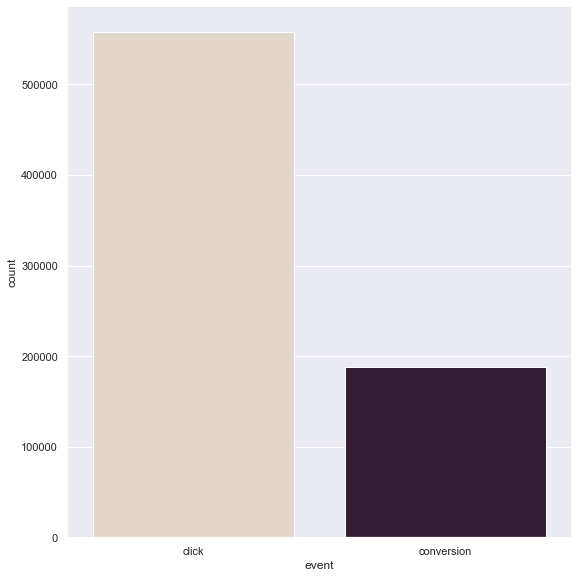

In [23]:
sns.catplot(x="event", kind="count", palette="ch:.25", data=raw, height = 8)

<AxesSubplot:xlabel='event', ylabel='count'>

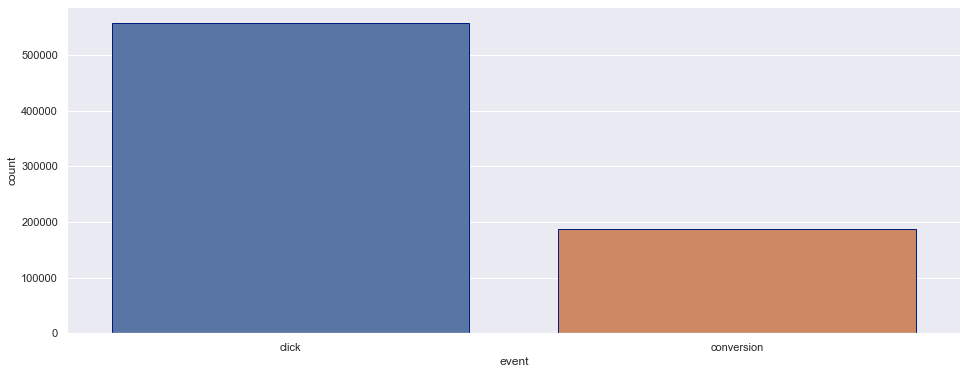

In [27]:
fig, ax = plt.subplots(figsize= (16,6))
sns.countplot(x='event', data=raw, edgecolor=sns.color_palette("dark", 1))

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

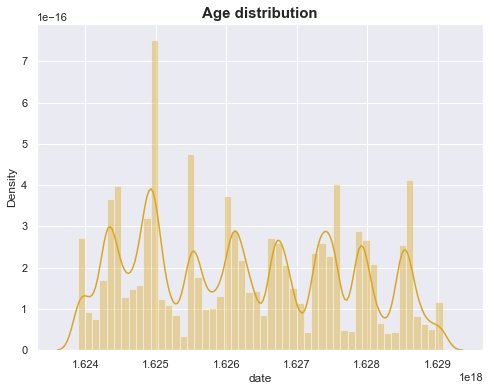

In [28]:
fig, ax = plt.subplots(figsize= (8,6))
sns.distplot(raw.date, color ='goldenrod').set_title("Age distribution",fontdict= { 'fontsize': 15, 'fontweight':'bold'} )
#sns.set(font_scale=1.2)

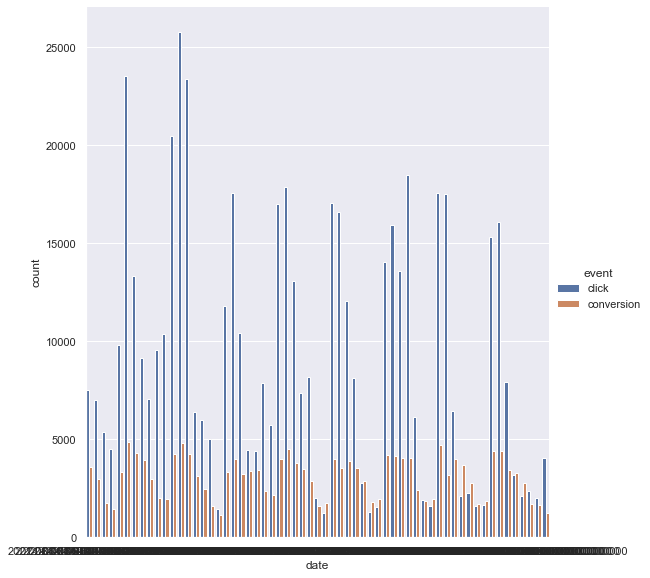

In [29]:


sns.catplot(x="date", kind="count", data=raw, height = 8, hue= 'event')

In [31]:
raw.describe()

,cpc
count,743157.000000
mean,0.489086
std,0.414211
min,0.000000
25%,0.000000
50%,0.450000
75%,0.700000
max,2.000000


In [32]:
raw.head()

,date,customer_id,user,source,event,cpc
0,2021-06-17,abcd,a4377f578b2728a7d84994052aeb527a,Programmatic Ads,click,2.000000
1,2021-06-17,1234,f533b4da097a318642011b91370dfb09,Paid Search,click,0.320000
2,2021-06-17,1234,9278529d8b7b0625d30da429d6f7c86c,Video,click,0.447014
3,2021-06-17,abcd,9672181fe003ef21d2509acabfe9fbc6,Programmatic Ads,click,0.655175
4,2021-06-17,1234,34b05a35e41b90a25d346d8f203b6c24,Job Board,click,0.458179


In [34]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745476 entries, 0 to 745475
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         745476 non-null  datetime64[ns]
 1   customer_id  745476 non-null  object        
 2   user         744918 non-null  object        
 3   source       557754 non-null  object        
 4   event        745476 non-null  object        
 5   cpc          743157 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 34.1+ MB


In [59]:
raw.groupby(['event']).count()

,date,customer_id,user,source,cpc
event,,,,,
click,557754,557754,557196,557754,555435
conversion,187722,187722,187722,0,187722


In [35]:
raw.groupby(['customer_id', 'event']).count()

date    user  source     cpc
customer_id event                                     
1234        click       371950  371661  371950  369657
            conversion  142818  142818       0  142818
abcd        click       120759  120685  120759  120733
            conversion   11405   11405       0   11405
xyz         click        65045   64850   65045   65045
            conversion   33499   33499       0   33499

In [37]:
raw.groupby(['customer_id']).count()

,date,user,source,event,cpc
customer_id,,,,,
1234,514768,514479,371950,514768,512475
abcd,132164,132090,120759,132164,132138
xyz,98544,98349,65045,98544,98544


In [56]:
g = raw.groupby(['customer_id', 'event'], as_index= False ).count()

In [57]:
g.head()

,customer_id,event,date,user,source,cpc
0,1234,click,371950,371661,371950,369657
1,1234,conversion,142818,142818,0,142818
2,abcd,click,120759,120685,120759,120733
3,abcd,conversion,11405,11405,0,11405
4,xyz,click,65045,64850,65045,65045


In [58]:
g.sort_values(by='event', ascending=False)

,customer_id,event,date,user,source,cpc
1,1234,conversion,142818,142818,0,142818
3,abcd,conversion,11405,11405,0,11405
5,xyz,conversion,33499,33499,0,33499
0,1234,click,371950,371661,371950,369657
2,abcd,click,120759,120685,120759,120733
4,xyz,click,65045,64850,65045,65045


In [83]:
total_cost = raw.cpc.sum()
round(total_cost,2)

363467.32

In [91]:
cusX= raw[raw.customer_id == 1234]

In [92]:
cusX


,date,customer_id,user,source,event,cpc
1,2021-06-17,1234,f533b4da097a318642011b91370dfb09,Paid Search,click,0.320000
2,2021-06-17,1234,9278529d8b7b0625d30da429d6f7c86c,Video,click,0.447014
4,2021-06-17,1234,34b05a35e41b90a25d346d8f203b6c24,Job Board,click,0.458179
5,2021-06-17,1234,09130a0221fa88a697f8e4f8716c5ab3,Paid Search,click,0.450437
6,2021-06-17,1234,9d7da1f72ffc9329aad60c1d5f440a89,Job Board,click,0.383559
...,...,...,...,...,...,...
745470,2021-08-16,1234,5fdf82af138f5232d312daf4d0fc87cf,NaN,conversion,0.000000
745472,2021-08-16,1234,45991a6b673c2d1a54e9c27140caa5a9,NaN,conversion,0.000000
745473,2021-08-16,1234,a57373ed99e93b997a2ebe4dbbe13268,NaN,conversion,0.000000
745474,2021-08-16,1234,00de494dbeed88ebf66508f4cf4781fd,NaN,conversion,0.000000


In [116]:
cusX.date.min(), cusX.date.max()

(Timestamp('2021-06-17 00:00:00'), Timestamp('2021-08-16 00:00:00'))

<AxesSubplot:xlabel='date'>

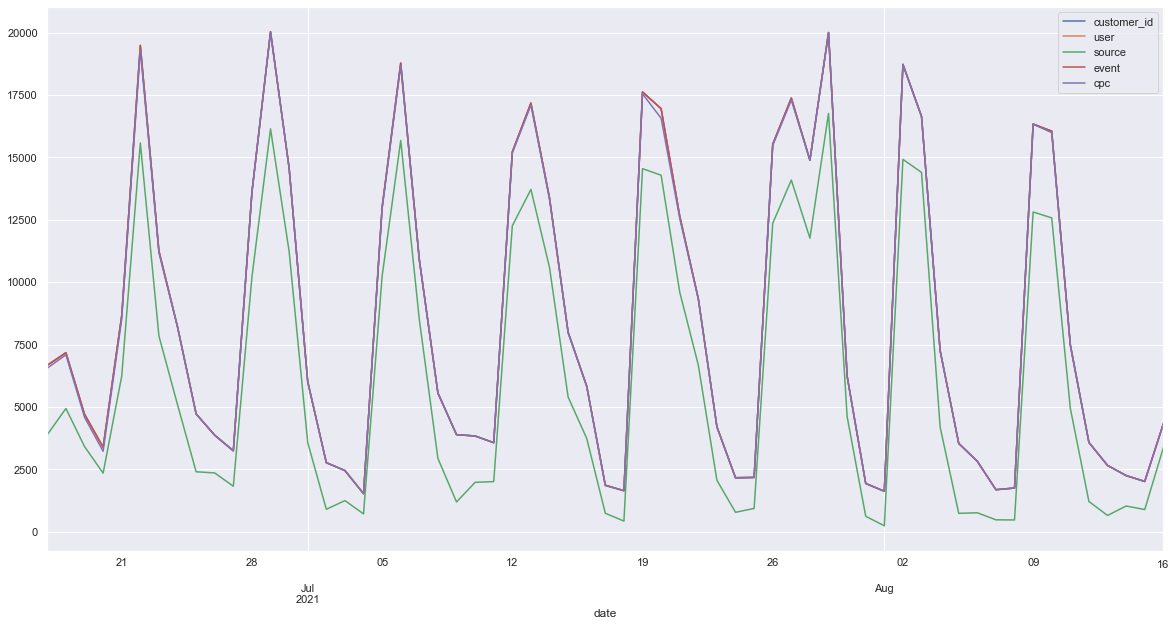

In [117]:
cusk= cusX.groupby(['date']).count()
cusk.plot(figsize= (20,10))

In [104]:
cusD= cusX.groupby(['date'], as_index= False).count()

In [105]:
cusD.head()

,date,customer_id,user,source,event,cpc
0,2021-06-17,6669,6667,3888,6669,6555
1,2021-06-18,7173,7162,4936,7173,7087
2,2021-06-19,4705,4703,3411,4705,4585
3,2021-06-20,3383,3382,2342,3383,3219
4,2021-06-21,8663,8651,6233,8663,8521


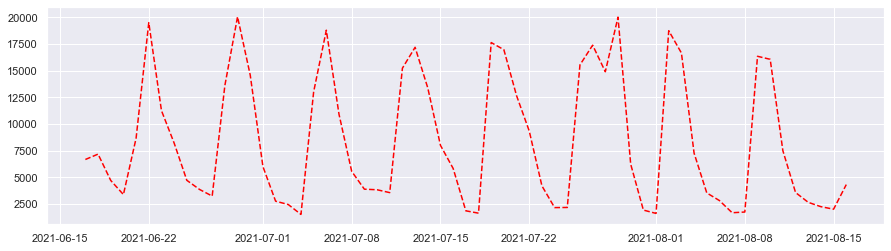

In [113]:
fig, ax = plt.subplots(figsize = (15,4))

ax.plot(cusD.date, cusD.customer_id, ls= '--', c= 'red')